In [1]:
#Analysis of the clinical data:
#1. Overall, the analysis shows that out of the four drugs, Capamolin was the most effectove
#2. Several categories of trends were analyzed: 
# Trend 1: change in the size of tumor in test mice over the course of 45 day treatment
# Trend 2: change in the number of metastatic sites in test mice over the course of 45 day treatment
# Trend 3: size of mice population still alive in the end of the same period of time
# In all three tests above, Capamolin proved to be most effective: It reduced the size of tumors in mice by 19%, while other
# drugs coused the size of tumors to increase by 46% - 57%. 
# Inconclusion, Capamolin is the most effective drug in the above categories
# Assumption 1: this analysis compares only four drugs: 'Capomulin', 'Infubinol', 'Ketapril', 'Placebo'
# Assmption 2: this analysis looks specifically only on the three trends, listed above.  


In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [3]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"
mouse_data = pd.read_csv(mouse_drug_data_to_load)
drugs_data=pd.read_csv(clinical_trial_data_to_load)
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data.head()
drugs_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
df = pd.merge(mouse_data, drugs_data, on='Mouse ID')
df1=df.copy()
df2=df.copy()
df3=df.copy()
# Display the data table for preview
df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_data_mean_df=df1.groupby(['Drug', 'Timepoint'])[['Tumor Volume (mm3)']].mean()
# Preview DataFrame
#tumor_data_df.groupby(['Drug','Timepoint']).groups.keys()
tumor_data_mean_df.rename(columns={'Tumor Volume (mm3)': 'Volume_Mean'}, inplace=True)
tumor_data_mean_df.reset_index(inplace=True)  
tumor_data_mean_df.head()

,Drug,Timepoint,Volume_Mean
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_data_sem_df=df1.groupby(['Drug', 'Timepoint'])[['Tumor Volume (mm3)']].sem()
# Preview DataFrame
tumor_data_sem_df.rename(columns={'Tumor Volume (mm3)': 'Volume_St_Error'},  inplace=True)
tumor_data_sem_df.reset_index(inplace=True)  
tumor_data_sem_df.head()

,Drug,Timepoint,Volume_St_Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
#drugs we are interested in
drug1_name = 'Capomulin'
drug2_name = 'Infubinol'
drug3_name = 'Ketapril'
drug4_name = 'Placebo'
#drug/tumor data
#four df for drug/tumor(sem)
drug1=tumor_data_sem_df['Drug']==drug1_name
drug2 = tumor_data_sem_df['Drug']==drug2_name
drug3=tumor_data_sem_df['Drug']==drug3_name
drug4=tumor_data_sem_df['Drug']==drug4_name
#create four separate df for 'mean' data
drug1_mean= tumor_data_mean_df[drug1]
drug2_mean=tumor_data_mean_df[drug2]
drug3_mean=tumor_data_mean_df[drug3]
drug4_mean=tumor_data_mean_df[drug4]
print(drug4_mean)


       Drug  Timepoint  Volume_Mean
50  Placebo          0    45.000000
51  Placebo          5    47.125589
52  Placebo         10    49.423329
53  Placebo         15    51.359742
54  Placebo         20    54.364417
55  Placebo         25    57.482574
56  Placebo         30    59.809063
57  Placebo         35    62.420615
58  Placebo         40    65.052675
59  Placebo         45    68.084082


In [8]:
#create four separate df for 'sem' data
drug1_sem= (tumor_data_sem_df[drug1]).round(4)
drug2_sem=(tumor_data_sem_df[drug2]).round(4)
drug3_sem=(tumor_data_sem_df[drug3]).round(4)
drug4_sem=(tumor_data_sem_df[drug4]).round(4)
print(drug1_sem)

        Drug  Timepoint  Volume_St_Error
0  Capomulin          0           0.0000
1  Capomulin          5           0.4486
2  Capomulin         10           0.7027
3  Capomulin         15           0.8386
4  Capomulin         20           0.9097
5  Capomulin         25           0.8816
6  Capomulin         30           0.9345
7  Capomulin         35           1.0522
8  Capomulin         40           1.2236
9  Capomulin         45           1.2240


In [9]:
# prep data for each subplot
lim=drug1_mean.count()
max=drug1_mean.max()
lim

# means arrays
means1 = drug1_mean['Volume_Mean']
means2 = drug2_mean['Volume_Mean']
means3 = drug3_mean['Volume_Mean']
means4 = drug4_mean['Volume_Mean']

# standard error arrays
sem1 = drug1_sem['Volume_St_Error']
sem2 = drug2_sem['Volume_St_Error']
sem3 = drug3_sem['Volume_St_Error']
sem4 = drug4_sem['Volume_St_Error']

print(means1)
print(sem1)
print(max)

0    45.000000
1    44.266086
2    43.084291
3    42.064317
4    40.716325
5    39.939528
6    38.769339
7    37.816839
8    36.958001
9    36.236114
Name: Volume_Mean, dtype: float64
0    0.0000
1    0.4486
2    0.7027
3    0.8386
4    0.9097
5    0.8816
6    0.9345
7    1.0522
8    1.2236
9    1.2240
Name: Volume_St_Error, dtype: float64
Drug           Capomulin
Timepoint             45
Volume_Mean           45
dtype: object


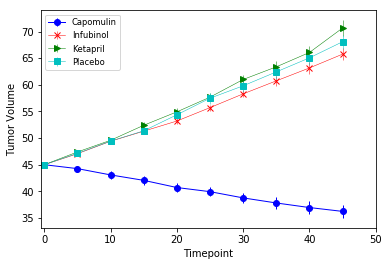

In [10]:
fig, ax = plt.subplots()
ax.errorbar(np.arange(0,50,5), means1, yerr=sem1, fmt="o", color="b",alpha=1,linestyle="solid", linewidth=1, label=drug1_name)
ax.errorbar(np.arange(0,50,5), means2, yerr=sem2, fmt="x", color="r",alpha=1,linestyle="solid", linewidth = .5,label=drug2_name)
ax.errorbar(np.arange(0,50,5), means3, yerr=sem3, fmt=">", color="g",alpha=1,linestyle="solid", linewidth = .5,label=drug3_name)
ax.errorbar(np.arange(0,50,5), means4, yerr=sem4, fmt="s", color="c",alpha=1,linestyle="solid",linewidth = .5,label=drug4_name)
ax.set_xlim(-0.5,50)
ax.set_xlabel("Timepoint")
ax.set_ylabel("Tumor Volume")
plt.legend(loc="best", fontsize="small", fancybox=True)
#plt.Title('Tumor size response to treatment')

plt.savefig("Tumor_size.png")
plt.show()


In [11]:
# Save the Figure
#plt.savefig("Tumor_size.png")

## Metastatic Response to Treatment

In [12]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
meta_data_mean_df=df1.groupby(['Drug', 'Timepoint'])[['Metastatic Sites']].mean()
meta_data_mean_df.rename(columns={'Metastatic Sites': 'Sites'}, inplace=True)
meta_data_mean_df.reset_index(inplace=True)  
meta_data_mean_df.head(20)

,Drug,Timepoint,Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_data_sem_df=df.groupby(['Drug', 'Timepoint'])[['Metastatic Sites']].sem()
# Preview DataFrame
meta_data_sem_df.rename(columns={'Metastatic Sites': 'Sites_St_Error'},  inplace=True)
meta_data_sem_df.reset_index(inplace=True)  
meta_data_sem_df.head()
#meta_data_sem_df.tail()

,Drug,Timepoint,Sites_St_Error
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [14]:
#separate four drug(sem)/meta data
drug1=meta_data_sem_df['Drug']==drug1_name
drug2 = meta_data_sem_df['Drug']==drug2_name
drug3=meta_data_sem_df['Drug']==drug3_name
drug4=meta_data_sem_df['Drug']==drug4_name
#create four separate df for 'mean' data
drug1_mean= meta_data_mean_df[drug1]
drug2_mean=meta_data_mean_df[drug2]
drug3_mean=meta_data_mean_df[drug3]
drug4_mean=meta_data_mean_df[drug4]
print(drug4_mean)
#round
drug1_sem= (meta_data_sem_df[drug1]).round(4)
drug2_sem=(meta_data_sem_df[drug2]).round(4)
drug3_sem=(meta_data_sem_df[drug3]).round(4)
drug4_sem=(meta_data_sem_df[drug4]).round(4)
#print(drug4_sem)

       Drug  Timepoint     Sites
50  Placebo          0  0.000000
51  Placebo          5  0.375000
52  Placebo         10  0.833333
53  Placebo         15  1.250000
54  Placebo         20  1.526316
55  Placebo         25  1.941176
56  Placebo         30  2.266667
57  Placebo         35  2.642857
58  Placebo         40  3.166667
59  Placebo         45  3.272727


In [15]:
#drug1_mean['Timepoint']

In [16]:
# prep data for each subplot
# means arrays
means4 = drug4_mean['Sites']
means1 = drug1_mean['Sites']
means2 = drug2_mean['Sites']
means3 = drug3_mean['Sites']

# standard error arrays
sem1 = drug1_sem['Sites_St_Error']
sem2 = drug2_sem['Sites_St_Error']
sem3 = drug3_sem['Sites_St_Error']
sem4 = drug4_sem['Sites_St_Error']

print(means1)
print(sem1)
print(max)

0    0.000000
1    0.160000
2    0.320000
3    0.375000
4    0.652174
5    0.818182
6    1.090909
7    1.181818
8    1.380952
9    1.476190
Name: Sites, dtype: float64
0    0.0000
1    0.0748
2    0.1254
3    0.1320
4    0.1616
5    0.1818
6    0.1729
7    0.1695
8    0.1756
9    0.2026
Name: Sites_St_Error, dtype: float64
Drug           Capomulin
Timepoint             45
Volume_Mean           45
dtype: object


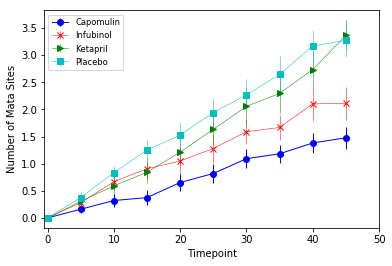

In [17]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
ax.errorbar(np.arange(0,50,5), means1,  yerr=sem1, fmt="o", color="b",alpha=1,linestyle="solid", linewidth=1, label=drug1_name)
ax.errorbar(np.arange(0,50,5), means2, yerr=sem2, fmt="x", color="r",alpha=1,linestyle="solid", linewidth = .5,label=drug2_name)
ax.errorbar(np.arange(0,50,5), means3, yerr=sem3, fmt=">", color="g",alpha=1,linestyle="solid", linewidth = .5,label=drug3_name)
ax.errorbar(np.arange(0,50,5), means4, yerr=sem4, fmt="s", color="c",alpha=1,linestyle="solid",linewidth = .5,label=drug4_name)
ax.set_xlim(-0.5, 50)
ax.set_xlabel("Timepoint")
ax.set_ylabel("Number of Mata Sites")

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.savefig("Meta_Sites.png")
plt.show()


## Survival Rates

In [18]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count_df=df2.groupby(['Drug', 'Timepoint'])[['Mouse ID']].count()
mouse_count_df.rename(columns={'Mouse ID': 'm_Count'},  inplace=True)
m_count = mouse_count_df
m_count.reset_index(inplace=True)  
#print(m_count)
# four DataFrames
drug1_df=m_count.loc[m_count['Drug'] ==drug1_name]
drug2_df=m_count.loc[m_count['Drug'] ==drug2_name]
drug3_df=m_count.loc[m_count['Drug'] ==drug3_name]
drug4_df=m_count.loc[m_count['Drug'] ==drug4_name]
print(drug1_df)

        Drug  Timepoint  m_Count
0  Capomulin          0       25
1  Capomulin          5       25
2  Capomulin         10       25
3  Capomulin         15       24
4  Capomulin         20       23
5  Capomulin         25       22
6  Capomulin         30       22
7  Capomulin         35       22
8  Capomulin         40       21
9  Capomulin         45       21


<function matplotlib.pyplot.show(*args, **kw)>

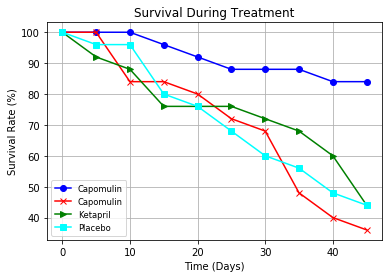

In [19]:
plt.plot(drug1_df['Timepoint'], drug1_df['m_Count']/25*100, 'o', linestyle='solid', label=drug1_name, color='blue')
plt.plot(drug1_df['Timepoint'], drug2_df['m_Count']/25*100,'x',linestyle='solid', label=drug1_name, color='red')
plt.plot(drug1_df['Timepoint'], drug3_df['m_Count']/25*100,'>',linestyle='solid',label=drug3_name,  color='green')
plt.plot(drug1_df['Timepoint'], drug4_df['m_Count']/25*100,'s',linestyle='solid',label=drug4_name, color='cyan')
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)
# Save the Figure
plt.savefig("Mouse Survival Rate")
plt.show


## Summary Bar Graph

In [20]:
# Calculate the percent changes for each drug
maxpoint = drug1_mean['Timepoint'].max()
minpoint = drug1_mean['Timepoint'].min()
#for drug1: (last-first)/first *100%
drug1_change= tumor_data_mean_df[drug1]
drug2_change = tumor_data_mean_df[drug2]
drug3_change=tumor_data_mean_df[drug3]
drug4_change=tumor_data_mean_df[drug4]
drug1_change
#print(drug2_change)
#print(drug3_change)
#print(drug4_change)


,Drug,Timepoint,Volume_Mean
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [21]:
val1_max=(drug1_change.loc[drug1_change['Timepoint']==maxpoint]['Volume_Mean']).iloc[0]
val1_min=(drug1_change.loc[drug1_change['Timepoint']==minpoint]['Volume_Mean']).iloc[0]
val1=(val1_max-val1_min)/val1_min *100

val2_max=(drug2_change.loc[drug2_change['Timepoint']==maxpoint]['Volume_Mean']).iloc[0]
val2_min=(drug2_change.loc[drug2_change['Timepoint']==minpoint]['Volume_Mean']).iloc[0]
val2=(val2_max-val2_min)/val2_min *100
val3_max=(drug3_change.loc[drug3_change['Timepoint']==maxpoint]['Volume_Mean']).iloc[0]
val3_min=(drug3_change.loc[drug3_change['Timepoint']==minpoint]['Volume_Mean']).iloc[0]
val3=(val3_max-val3_min)/val3_min *100
val4_max=(drug4_change.loc[drug4_change['Timepoint']==maxpoint]['Volume_Mean']).iloc[0]
val4_min=(drug4_change.loc[drug4_change['Timepoint']==minpoint]['Volume_Mean']).iloc[0]
val4=(val4_max-val4_min)/val4_min *100

print(val1)
print(val2)
print(val3)
print(val4)

-19.475302667894173
46.12347172785187
57.028794686606076
51.29796048315153


In [22]:
# Store all Relevant Percent Changes into a Tuple
bar_values=(val1.round(2), val2.round(2), val3.round(2), val4.round(2))
drug_names=(drug1_name, drug2_name, drug3_name, drug4_name)
x_axis = np.arange(len(bar_values))
tick_locations = [value+0.4 for value in x_axis]
tick_locations
print(bar_values[0])

-19.48


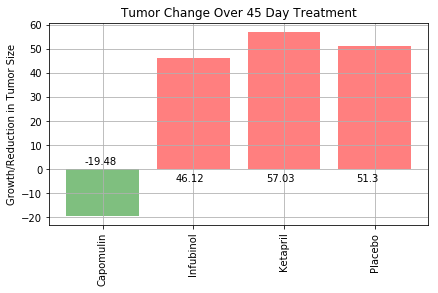

In [24]:
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc.
# Use functions to label the percentages of changes
def build_bars(i,bars):
    b=bars[i]
    if b<0 :
        plt.bar(i, b, color='g', alpha=0.5, align="edge")
        plt.text(x=0.2 , y=2, s=b, size = 10)
    else:
        plt.bar(i, b, color='r', alpha=0.5, align="edge")
        plt.text(x=0.2 +i , y=-5, s=b, size = 10)

for i in x_axis:
    build_bars(i,bar_values)

plt.xticks(tick_locations, drug_names, rotation="vertical")
plt.tight_layout()
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("Growth/Reduction in Tumor Size")
plt.grid(True)
plt.savefig("Tumor_development_Bar.png")

plt.show()